# HET FINAL PRESENTATION: MINI-LECTURE ON SYMPY

### https://github.com/wortola5/HET_Presentation

# Outline 

### 1) Introduce Sympy with examples

### 2) Introduce Einsteinpy with examples

### 3) Use symbolic statistics to add random variable into a model 

# Introducing Sympy

In [470]:
import einsteinpy
from einsteinpy.symbolic import EinsteinTensor, MetricTensor
import astropy.units as u
from einsteinpy.rays import Shadow
from einsteinpy.plotting import ShadowPlotter
import numpy as np 
import sympy as smp
from sympy.stats import * 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

We will start by learning how to define symbols/variables and functions  

In [148]:
x = smp.symbols('x', real = True, positive = True) 
#the positive and real features are optional, no need to specify them if we don't want to. 

In [174]:
x**3

x**3

In [150]:
smp.exp(-x**2)

exp(-x**2)

In [151]:
smp.sin(2*x)

sin(2*x)

Now, that you get the idea... Let's work out some math with sympy

Define a new function

In [169]:
y = x**2 + 4*x + 3
l = x-3

print(y-l)
print(y+l)
print(2*y-l)
y

x**2 + 3*x + 6
x**2 + 5*x
2*x**2 + 7*x + 9


x**2 + 4*x + 3

and find how it factorizes: 

In [165]:
y.factor()

(x + 1)*(x + 3)

or find its zeros

In [171]:
smp.solve(y,x)


[-3, -1]

As expected... =)

We can also define multiple variables and solve for the zeros of the function in terms of one variable 

In [156]:
x,y,z = smp.symbols('x y z')

F = x**2+smp.sin(z)*y
F

x**2 + y*sin(z)

In [157]:
smp.solve(F,y)

[-x**2/sin(z)]

In [158]:
smp.solve(F,x)

[-sqrt(-y*sin(z)), sqrt(-y*sin(z))]

In [159]:
smp.solve(F,z)

[asin(x**2/y) + pi, -asin(x**2/y)]

If we have an equation we might want to also have numerical values for it, for example if we want to plot it

In [160]:
y = x**2 * smp.sin(x)*smp.exp(-x**2)

In [161]:
y_expr = smp.lambdify([x],y)

In [162]:
y_expr(3)

0.00015674033292640966

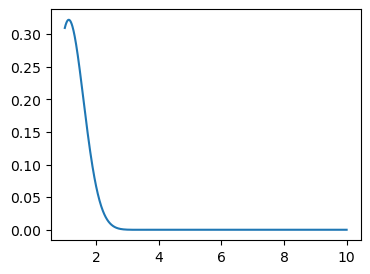

In [163]:
values = np.linspace(1,10,1000)
figure(figsize=(4, 3))
plt.plot(values,y_expr(values))
plt.show()

We can also plot with simpy without the need of matplotlib

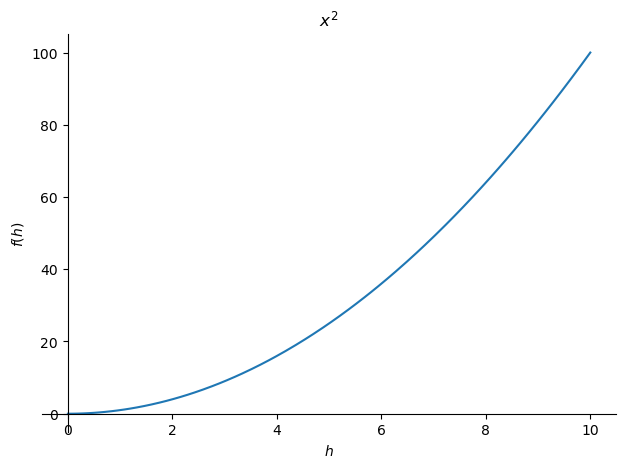

In [495]:
h = smp.symbols('h')
smp.plot(h**2,show=False)
smp.plot(h**2,(h,0,10),title = r'$x^2$',show=True)#We can choose the range of x-axis
smp.plot(h**2,h,2*h,h**3,(h,0,2),show=False, legend=False)#we can also plot multiple plots at the same time


But we can do more than just simple algebra oprations, we can also do some calculus and therefore physics. 

### LIMITS: 

Take the limit of $\;\;\; \lim_{x\rightarrow \pi} \; \sin(\frac{x}{2} + \sin(x)) $

In [17]:
smp.limit(smp.sin(x/2 + smp.sin(x)), x, smp.pi)

1

### Derivatives

Take the derivative of $(1 + \tan(x))e^{-x^2}$ 

In [18]:
smp.diff(((1 + smp.tan(x)) / (smp.exp(x**2))), x)

-2*x*(tan(x) + 1)*exp(-x**2) + (tan(x)**2 + 1)*exp(-x**2)

### Integrals

take the integral of $\int \csc(x) \cos(x) dx$

In [19]:
smp.integrate(smp.csc(x)*smp.cot(x), x)

-1/sin(x)

take integral $\int_{0}^{a} x^{5} e^{x}\;dx$

In [498]:
x = smp.symbols('x')
a = smp.symbols('a')
smp.integrate(x**5*smp.exp(x), (x, 0, a))

(a**5 - 5*a**4 + 20*a**3 - 60*a**2 + 120*a - 120)*exp(a) + 120

We can also do Integral over different variables: $\int_{0}^{1}\int_{0}^{1-x^2}\int_{3}^{4-x^2-y^2}x \; dzdydx$

In [449]:
x, y, z = smp.symbols('x, y, z')
f = x
smp.integrate(f, (z, 3, 4-x**2-y**2), (y, 0, 1-x**2), (x, 0, 1))

1/8

### i) Example 1: Algebra 

Consider an artilleryman firing a cannon down into a valley.
He knows the initial position ($x_0$, $y_0$) and orientation, $\theta$, of the
cannon as well as the muzzle velocity, v, and the altitude of
the target, $y_f$. 

Our missions is to find flight time and displacement during flight time across the x-axis.

Ans: We can solve this problem in different ways using sympy but let us start by defining some quantities. Given this is a projectile problem we define  

In [342]:
#method 1: Use sympy to solve numerically for t
x0= 0 #m
y0= 0 #m
yf= -30 #m
g = -9.8 #m/s^2
v = 30 #m/s
theta = smp.pi/4

In [343]:
t = smp.symbols('t',positive=True,real=True) 
y = y0 + v * smp.sin(theta) * t + g*t**2
flight_time = smp.solve(y - yf, t)
xf = x0 + v * smp.cos(theta) * flight_time[0]

print('flight time =',flight_time[0],'s')
print('final position=',xf.evalf(),'m')# evaluate xf numerically

flight time = 3.13963743586267 s
final position= 66.6017676409691 m


In [330]:
#Method 2: Solve Symbolically
x0 = smp.symbols('x_0')
y0 = smp.symbols('y_0')
yf = smp.symbols('y_f')
g = smp.symbols('g')
v = smp.symbols('v')
theta = smp.symbols('theta')

In [339]:
y = y0 + v * smp.sin(theta) * t + g*t**2
flight_time = smp.solve(y - yf, t)
flight_time[0] #Since this solves for a polynomial of second order there are two solutions. 

(-v*sin(theta) + sqrt(-4*g*y_0 + 4*g*y_f + v**2*sin(theta)**2))/(2*g)

In [341]:
xf = x0 + v * smp.cos(theta) * flight_time[0]
xf

x_0 + v*(-v*sin(theta) + sqrt(-4*g*y_0 + 4*g*y_f + v**2*sin(theta)**2))*cos(theta)/(2*g)

### ii) Example 2: Calculus

We have a car moving along the x-axis with a hanging bob. The bob is suspended with a string of constant lenght R that can oscillate in the plane. Find the equations of motions: 

Ans: We will find the equations of motion through the Lagrangian equations $\frac{d}{dt}\frac{\partial L}{\partial \dot{q}} = \frac{\partial L}{\partial q}$, where $L = T(q,\dot{q}) -V(q,\dot{q})$. 

We will take the displacement of the car from the initial position as $z(t)$, and the oscillation of the bob as $\theta(t)$.

Let us start by writing variables we need 

In [451]:
t, R, g, m1, m2 = smp.symbols('t R g m_1 m_2') #g=acceleration of gravity, m1 = mass of car, m2 = mass of bob. 
z, theta = smp.symbols(r'z \theta', cls=smp.Function)#cls = class and allows us to define it as a function
z = z(t)
theta = theta(t)

dzdt = smp.diff(z,t)
dthedt = smp.diff(theta,t)

The location of the car is then given by 

In [452]:
x = z + R*smp.sin(theta)
y = -R*smp.cos(theta)

Continue by writing the Potential and kinetic energy of the system. 

In [455]:
T1 = smp.Rational(1,2) * m1 * smp.diff(z,t)**2 #KE of car #smp.Rational =1/2
T2 = smp.Rational(1,2) * m2 * (smp.diff(x,t)**2 + smp.diff(y,t)**2) #KE of Bob
T = T1 + T2 #Total KE 
V1 = 0 #PE of car 
V2 = m2*g*y #PE of Bob
V = V1 + V2 #Total Potential 

Compute Lagrangian

In [459]:
L = T-V
L

R*g*m_2*cos(\theta(t)) + m_1*Derivative(z(t), t)**2/2 + m_2*(R**2*sin(\theta(t))**2*Derivative(\theta(t), t)**2 + (R*cos(\theta(t))*Derivative(\theta(t), t) + Derivative(z(t), t))**2)/2

Get the equations of Motion

In [460]:
LE1 = smp.diff(L, z) - smp.diff(smp.diff(L,dzdt), t)
LE2 = smp.diff(L, theta) - smp.diff(smp.diff(L,dthedt), t)

LE1

-m_1*Derivative(z(t), (t, 2)) - m_2*(-2*R*sin(\theta(t))*Derivative(\theta(t), t)**2 + 2*R*cos(\theta(t))*Derivative(\theta(t), (t, 2)) + 2*Derivative(z(t), (t, 2)))/2

In [461]:
LE2

-R*g*m_2*sin(\theta(t)) + m_2*(2*R**2*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), t)**2 - 2*R*(R*cos(\theta(t))*Derivative(\theta(t), t) + Derivative(z(t), t))*sin(\theta(t))*Derivative(\theta(t), t))/2 - m_2*(2*R**2*sin(\theta(t))**2*Derivative(\theta(t), (t, 2)) + 4*R**2*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), t)**2 - 2*R*(R*cos(\theta(t))*Derivative(\theta(t), t) + Derivative(z(t), t))*sin(\theta(t))*Derivative(\theta(t), t) + 2*R*(-R*sin(\theta(t))*Derivative(\theta(t), t)**2 + R*cos(\theta(t))*Derivative(\theta(t), (t, 2)) + Derivative(z(t), (t, 2)))*cos(\theta(t)))/2

We can now ask sympy to solve for the specific second derivative of each coordinate, i.e. $\frac{d^2z}{dt^2}$ and $\frac{d^2\theta}{dt^2}$

In [466]:
sols = smp.solve([LE1, LE2], [smp.diff(z,t,t), smp.diff(theta,t,t)])
sols

{Derivative(z(t), (t, 2)): R*m_2*sin(\theta(t))**3*Derivative(\theta(t), t)**2/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2) + R*m_2*sin(\theta(t))*cos(\theta(t))**2*Derivative(\theta(t), t)**2/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2) + g*m_2*sin(\theta(t))*cos(\theta(t))/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2),
 Derivative(\theta(t), (t, 2)): -R*m_2*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), t)**2/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2) - g*m_1*sin(\theta(t))/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2) - g*m_2*sin(\theta(t))/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2)}

This is difficult to read so we can call each solution specifically as if we would call an element in a numpy array

$\frac{d^2\theta}{dt^2} = $

In [468]:
sols[smp.diff(theta, t,t)].simplify() #Second order derivative of theta 

-(R*m_2*cos(\theta(t))*Derivative(\theta(t), t)**2 + g*m_1 + g*m_2)*sin(\theta(t))/(R*(m_1 + m_2*sin(\theta(t))**2))

$\frac{d^2z}{dt^2} = $ 

In [469]:
sols[smp.diff(z,t,t)].simplify()

m_2*(R*Derivative(\theta(t), t)**2 + g*cos(\theta(t)))*sin(\theta(t))/(m_1 + m_2*sin(\theta(t))**2)

#

# Einsteinpy 

With Einsteinpy we can do many things such as illustraiting a black hole and its intensity as a function of radius 

In [471]:
mass = 1 * u.kg #mass of blackhole
fov = 30 * u.km #what is the radial size we are seeing the black hole 

In [472]:
shadow = Shadow(mass=mass, fov=fov, n_rays=1000) #Creates the black hole intensity given 
                                                 #the values that we want

We can now plot the Blackhole according to its intensity or simply as an image

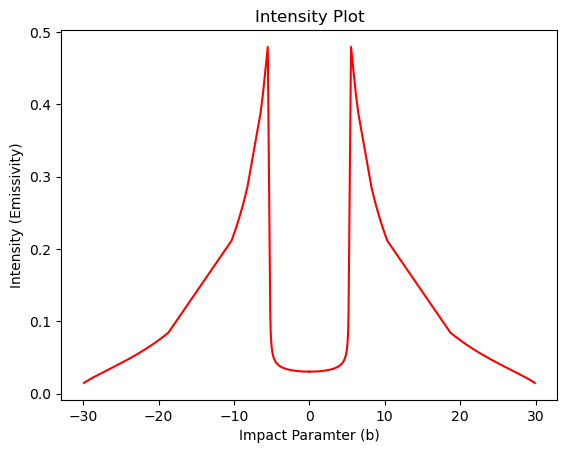

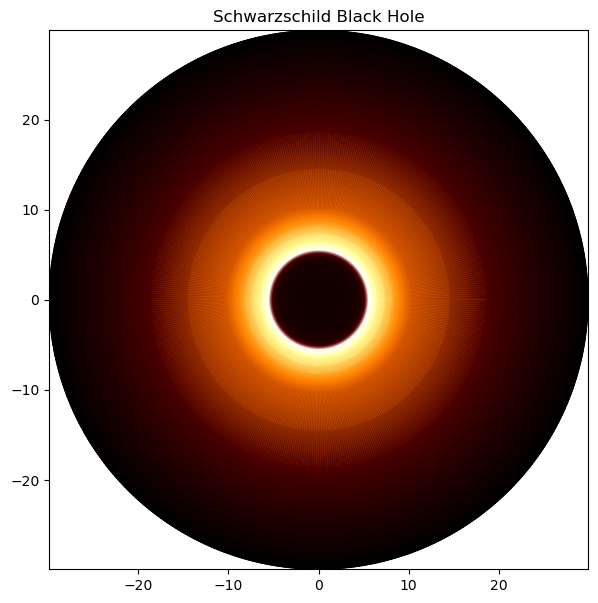

In [476]:
#Intensity Plot 
obj = ShadowPlotter(shadow=shadow, is_line_plot=True) 
obj.plot()
obj.show()

im = ShadowPlotter(shadow=shadow, is_line_plot=False) 
im.plot()
im.show()

We can do many more things, but today I'll focus on solving the Einstein Field Equation symbollicaly using sympy. 

Einstein Field Equations are $G_{\mu\nu} = 8 \pi G T_{\mu \nu}$. Where $G_{\mu\nu} $ is the Einstein Tensor and is defined with $G_{\mu\nu} = R_{\mu\nu} - 1/2 R g_{\mu \nu}$, $T_{\mu\nu}$ is the stress-energy tensor and $G$ is the gravitational constant. 

I will show how we can use Einsteinpy, a sympy module, to solve these non-linear differential equations for a homogeneous, isotropic and flat space. 

In [119]:
syms = smp.symbols("t r phi theta")
t,r,phi,theta = syms
a = smp.Function("a") #scale factor 
m = smp.diag(-1,a(t)**2,a(t)**2,a(t)**2).tolist()

In [120]:
Metric = MetricTensor(m,syms)

In [121]:
Metric.tensor()

[[-1, 0, 0, 0], [0, a(t)**2, 0, 0], [0, 0, a(t)**2, 0], [0, 0, 0, a(t)**2]]

With Einsteinpy we do not need to calculate The Ricci tensor and Ricci scalar to then find the Einstein tensor, we can directly compute using EinsteinTensor.

In [126]:
Eins_Tensor = EinsteinTensor.from_metric(Metric)
Eins_Tensor.simplify()

[[3.0*Derivative(a(t), t)**2/a(t)**2, 0, 0, 0], [0, -2.0*a(t)*Derivative(a(t), (t, 2)) - 1.0*Derivative(a(t), t)**2, 0, 0], [0, 0, -2.0*a(t)*Derivative(a(t), (t, 2)) - 1.0*Derivative(a(t), t)**2, 0], [0, 0, 0, -2.0*a(t)*Derivative(a(t), (t, 2)) - 1.0*Derivative(a(t), t)**2]]

Let us now define the Hubble constant so that we can use it in our results

In [123]:
H = smp.symbols("H")

In [124]:
smp.Eq(H,smp.diff(a(t),t)/a(t))

Eq(H, Derivative(a(t), t)/a(t))

We also define the time,time component of the Einstein Tensor and Stress energy tensor

In [132]:
G_00,T_00 = smp.symbols('G_00,T_00')

In [133]:
G_00 = Eins_Tensor[0,0]
G_00 = G_00.subs(smp.diff(a(t),t)/a(t),H).simplify()
G_00

3.0*H**2

We have found the LHS, next we find the RHS.

If we take the universe to be a perfect fluid then $T_{\mu\nu} = diag(\rho, P,P,P)$, with $\rho$ being the energy density and P pressure. 

Therefore, the first Fridman Equation is (corresponding to the time, time solution of the Einstein's equations)

In [137]:
#define rho and G first
rho = smp.symbols('rho')
G = smp.symbols('G')

first_Friedman = smp.Eq(G_00,8*smp.pi*G*T_00)
first_Friedman.subs(T_00,rho)

Eq(3.0*H**2, 8*pi*G*rho)

Likewise we can find the second Friedman equation by getting the i,i components of the Einstein Field Equations

In [144]:
G_ii,T_ii, P = smp.symbols('G_ii T_ii P')

G_ii = Eins_Tensor[1,1]
G_ii = G_ii.subs(smp.diff(a(t),t)/a(t),H).simplify()
Second_Friedman = smp.Eq(G_ii,8*smp.pi*G*T_ii)
Second_Friedman = Second_Friedman.subs(T_ii,P)
Second_Friedman

Eq(-2.0*a(t)*Derivative(a(t), (t, 2)) - 1.0*Derivative(a(t), t)**2, 8*pi*G*P)

This does not look like the Second Friedman equation, but if one divides by 2 and by $a(t)^2$ and plug Friedman's first equation for $(da(t)/dt \times 1/a(t))^2$ we obtain the usual result!

### i) EXAMPLE: Finding age of universe 

Let us introduce a cosmologica constant $\Lambda$ into the left hand side of the Einstein Field Equations such that we now have $G_{\mu\nu} + \Lambda g_{\mu \nu} = 8 \pi T_{\mu \nu} $. This constant is a way through which cosmologist try to explain the accelerated expansion of the universe, dark energy, and it will play the role of measuring the energy density of dark energy. Today, let us assume this is the right model of the universe. Therefore our first Friedman equation is now 

$H^2(t) = \frac{8 \pi G}{3}\rho + \frac{\Lambda}{3}$.

In the universe we have also have radiation and matter. Therefore, we can take $\rho$ as 

$\frac{8 \pi G}{3}\rho = \frac{C_r}{a^4(t)} + \frac{C_m}{a^{3}(t)}$,

with $C_r$ being a consant that measure the energy density due to radiation, $C_m$ measuring the energy density due to matter (including DM), and $a(t)$ being the dimensionless scale factor which tells us how the universe expands its space as a function of time. Therefore,

$H^2(t) = \frac{C_r}{a^4(t)} + \frac{C_m}{a^{3}(t)} + \frac{\Lambda}{3}$

Let us know take a toy model for $a(t) = 3 e^{-t^2}$, such that 

$H^2(t) = \frac{1}{3}\left(C_r e^{4t^2}  + C_m e^{3t^2} + \Lambda\right)$


If we know that $H^2(t_{today}) = 4900$ (equivalent to $H(t_{today}) = 70$) what is the the age of the universe, $t_{today}$? If $\Lambda = 140$, $C_m = 48$, and $C_r = 3.8$.

In [182]:
#We can solve this problem in different ways:
#define our given values
lam = 140
C_m = 48
C_r = 3.8

#First way: Try using a while loop
t = 0
dt = 0.00001
H_f = 4900
H_sq = 0
while H_sq < H_f:
    t += dt
    H_sq = 1/3*(C_r*smp.exp(4*t**2)+C_m*smp.exp(3*t**2)+lam)
    
print('Age of universe based on guess for energy content = ',t)

Age of universe based on guess for energy content =  1.3330400000002656


Funny Enough if we take $t$ to have the units $t = 1 = 10$billion years, our result tells us that the universe is 13.3 billion years old (Very close to the value of 13.7 billion years measuerd).

In [186]:
#Second Way: Try using Sympy

t = smp.symbols('t', real= True, positive= True)
H_sq = 1/3*(C_r*smp.exp(4*t**2)+C_m*smp.exp(3*t**2)+lam)

age_of_universe = smp.solve(H_sq - H_f,t)

In [189]:
print('Age of universe based on guess for energy content = ',age_of_universe)

Age of universe based on guess for energy content =  1.33303074348126


# Symbolic Statistics 

In real life, the constants $\Lambda$, $C_m$ and $C_r$ have uncertainities associated with them. Here is where Symbolic statistics becomes very useful

In [200]:
lam = Normal('lam',140,25)
pdf_lam = density(lam)
z = smp.symbols('z')
pdf_lam(z)

sqrt(2)*exp(-(z - 140)**2/1250)/(50*sqrt(pi))

In [201]:
C_m = Normal('C_m',48,5)
pdf_Cm = density(C_m)
y = smp.symbols('y')
pdf_Cm(y)

sqrt(2)*exp(-(y - 48)**2/50)/(10*sqrt(pi))

In [223]:
C_r = Normal('C_r',3.8,0.5)
pdf_Cr = density(C_r)
h = smp.symbols('h')
pdf_Cr(h)

1.0*sqrt(2)*exp(-28.88*(0.263157894736842*h - 1)**2)/sqrt(pi)

In [211]:
P(lam<120)

sqrt(2)*(-5*sqrt(2)*sqrt(pi)*erf(2*sqrt(2)/5)/4 + 5*sqrt(2)*sqrt(pi)/4)/(5*sqrt(pi))

In [210]:
P(lam>120)

1 - erfc(2*sqrt(2)/5)/2

In [227]:
P(C_m> 40)

1 - erfc(4*sqrt(2)/5)/2

In [484]:
C_r = 3.8
#C_r = Normal('C_r',3.8,0.5)
#C_m = Normal('C_m',48,5)
C_m = 48
lam = Normal('lam',140,25)
#lam = 140
t=smp.symbols('t', positive=True, real=True)

H_f = 4900
H_sq = 1/3*(C_r*smp.exp(4*t**2)+C_m*smp.exp(3*t**2)+lam)


In [501]:
P(H_f>H_sq)#.subs(t,0.4).simplify()

6.50437532886074e-73658*sqrt(2)*(-411.818989363045*pi*(1.0 - 0.000260989010989011*exp(4*t**2)/(1.0 - 0.0032967032967033*exp(3*t**2)))*(1.0 - 0.0032967032967033*exp(3*t**2))*exp(169594.88*(1.0 - 0.000260989010989011*exp(4*t**2)/(1.0 - 0.0032967032967033*exp(3*t**2)))**2*(1.0 - 0.0032967032967033*exp(3*t**2))**2)*erf(411.818989363045*(1.0 - 0.000260989010989011*exp(4*t**2)/(1.0 - 0.0032967032967033*exp(3*t**2)))*(1.0 - 0.0032967032967033*exp(3*t**2))) - 411.818989363045*pi*(1.0 - 0.000260989010989011*exp(4*t**2)/(1.0 - 0.0032967032967033*exp(3*t**2)))*(1.0 - 0.0032967032967033*exp(3*t**2))*exp(169594.88*(1.0 - 0.000260989010989011*exp(4*t**2)/(1.0 - 0.0032967032967033*exp(3*t**2)))**2*(1.0 - 0.0032967032967033*exp(3*t**2))**2))*exp((-0.011552*exp(5*t**2) - 0.29184*exp(4*t**2) - 1.8432*exp(3*t**2) + 88.5248*exp(t**2) + 1118.208)*exp(3*t**2))/(pi*(1.0 - 0.000260989010989011*exp(4*t**2)/(1.0 - 0.0032967032967033*exp(3*t**2)))*(0.0032967032967033*exp(3*t**2) - 1.0))

#


We can do the same thing with the velocity of the projectile in the example above. We take the velocity as a random variable that can take certain range of values each with a certain probability and being normally distributed

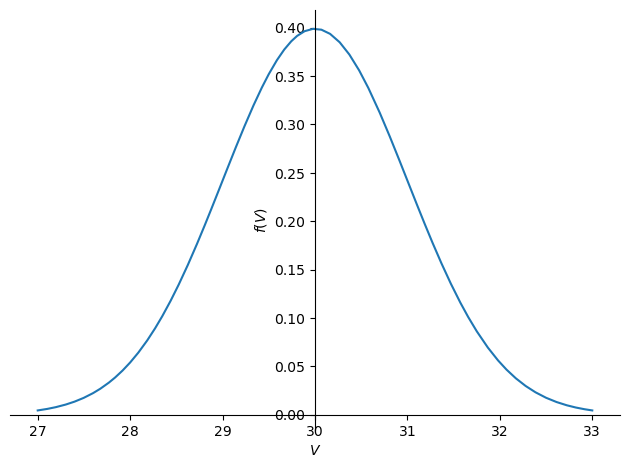

In [418]:
v = Normal('v', 30,1)#Normal distribution
pdf = density(v)#Probability distribution function
V = smp.symbols('V')
smp.plot(pdf(V),(V,27,33))

In [419]:
pdf(V) #Probability distribution function

sqrt(2)*exp(-(V - 30)**2/2)/(2*sqrt(pi))

In [427]:
P(v > 31).simplify()

1/2 - erf(sqrt(2)/2)/2

In [486]:
x0= 0 #m
y0= 0 #m
yf= -30 #m
g = -9.8 #m/s^2
v = Normal('v', 30,1)


In [488]:
t = smp.symbols('t',positive=True,real=True) 
y = y0 + v * smp.sin(theta) * t + g*t**2
y
flight_time = smp.solve(y - yf, t)
flight_time[0]

-1.74963553055941*sqrt(0.000850340136054422*sin(\theta(t))**2*v**2 + 1) + 0.0510204081632653*sin(\theta(t))*v

In [448]:
#smp.plot(P(y>yf),(t,4,7))
P(y>yf)#.subs(t,2)

2.31822379423345e+255*exp(-450)*exp(-900/t**2)*exp(-96.04*t**2)*exp(-900*sqrt(2)/t)*exp(294.0*sqrt(2)*t)*Integral(exp(-19.6*_z)*exp(-_z**2/t**2)*exp(60*_z/t**2)*exp(30*sqrt(2)*_z/t), (_z, 0, oo))/(sqrt(pi)*t)

In [478]:
E(flight_time[0]) #Given the distribution of the velocity, what is the most likely time the cannon will be in the air?

-0.874817765279706*sqrt(2)*exp(-450)*Integral(sqrt(0.000425170068027211*v**2 + 1.0)*exp(30*v)*exp(-v**2/2), (v, -oo, oo))/sqrt(pi) + 1.08230629773451

In [481]:
t = smp.symbols('t')
z=smp.symbols('z')

Integrand = smp.exp(-19.6*z)*smp.exp(-z**2/t**2)*smp.exp(60*z/t**2)*smp.exp(30*smp.sqrt(2)*z/t)

prob = 2.32*(10**255)*(smp.exp(-900/t**2))*(smp.exp(-96*t**2))*(smp.exp(-900*smp.sqrt(2)/t))*\
        smp.exp(294*smp.sqrt(2)*t)*smp.integrate(Integrand,(z,0,oo))/(smp.sqrt(smp.pi)*t*smp.exp(450))

In [482]:
prob.subs(t,2).simplify() #Probability that the Cannon is still on the air at t = 2. 

4.86010981985167e+459*(1 - erf(4.6 - 15.0*sqrt(2)))*exp(-1059 - 3.97903932025656e-13*sqrt(2))

#

# References

1) https://github.com/lukepolson/youtube_channel/blob/main/Python%20Tutorial%20Series/sympy1.ipynb

2) https://diposit.ub.edu/dspace/bitstream/2445/59759/1/TFG-Arnau-Romeu-Joan.pdf

3) https://docs.einsteinpy.org/en/stable/index.html

4) https://www.researchgate.net/publication/260585491_Symbolic_Statistics_with_SymPy